In [33]:
import matplotlib.pyplot as plt
from scipy import signal
from skimage import io
from skimage.color import rgb2gray
import numpy as np

In [34]:
image_og = io.imread('hawk.png')
image = rgb2gray(image_og)
sh = image.shape

In [35]:
hpf = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])/9

image_high = image.copy()
image_high[:, :] = signal.convolve2d(image[:, :], hpf, mode='same')

# image_high_boost = (a-1)*image + image_high

In [40]:
# lpf = np.ones((3, 3))/9

# image_low = image.copy()
# image_low[:, :] = signal.convolve2d(image[:, :], lpf, mode='same')

# image_high_boost = a*image - image_low

In [37]:
a = 1.1

hbf = np.array([[-1, -1, -1], [-1, 9*a-1, -1], [-1, -1 ,-1]])/9

image_high_boost = image.copy()
image_high_boost[:, :] = signal.convolve2d(image[:, :], hbf, mode='same')

In [42]:
image_unsharp = image + image_high

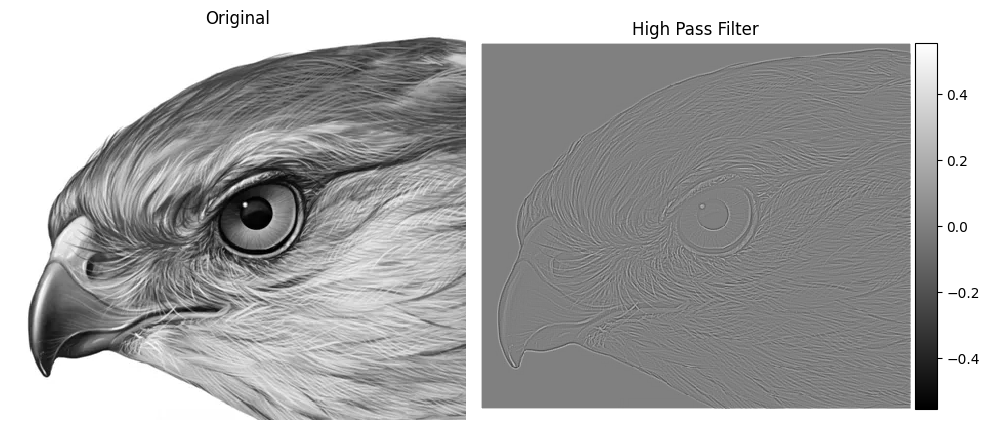

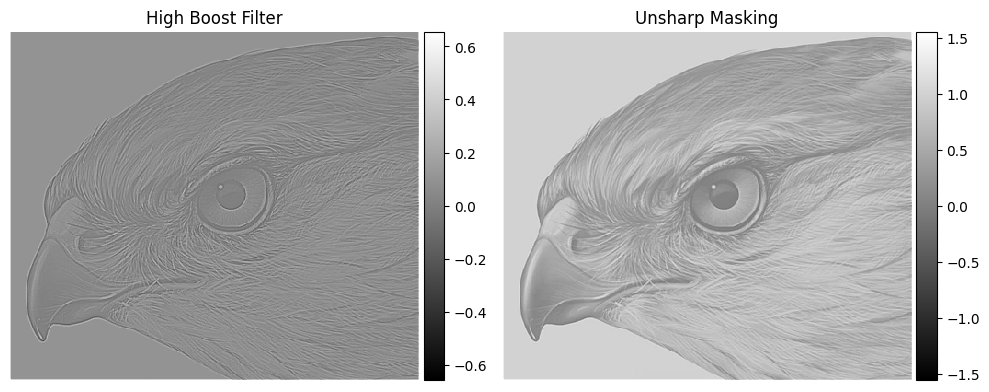

In [47]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
io.imshow(image)

plt.subplot(1, 2, 2)
plt.title('High Pass Filter')
plt.axis('off')
io.imshow(image_high, cmap = 'gray')

plt.show()

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('High Boost Filter')
plt.axis('off')
io.imshow(image_high_boost, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Unsharp Masking')
plt.axis('off')
io.imshow(image_unsharp, cmap = 'gray')

plt.show()